In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


# ****Data Exploration****

In [2]:
pokemon = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pokemon.shape

(800, 13)

In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
dup_ID = pokemon[pokemon['#'].duplicated(keep=False)]
dup_ID

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [6]:
dup_ID.shape

(144, 13)

In [7]:
len(dup_ID['#'].unique())

65

In [8]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


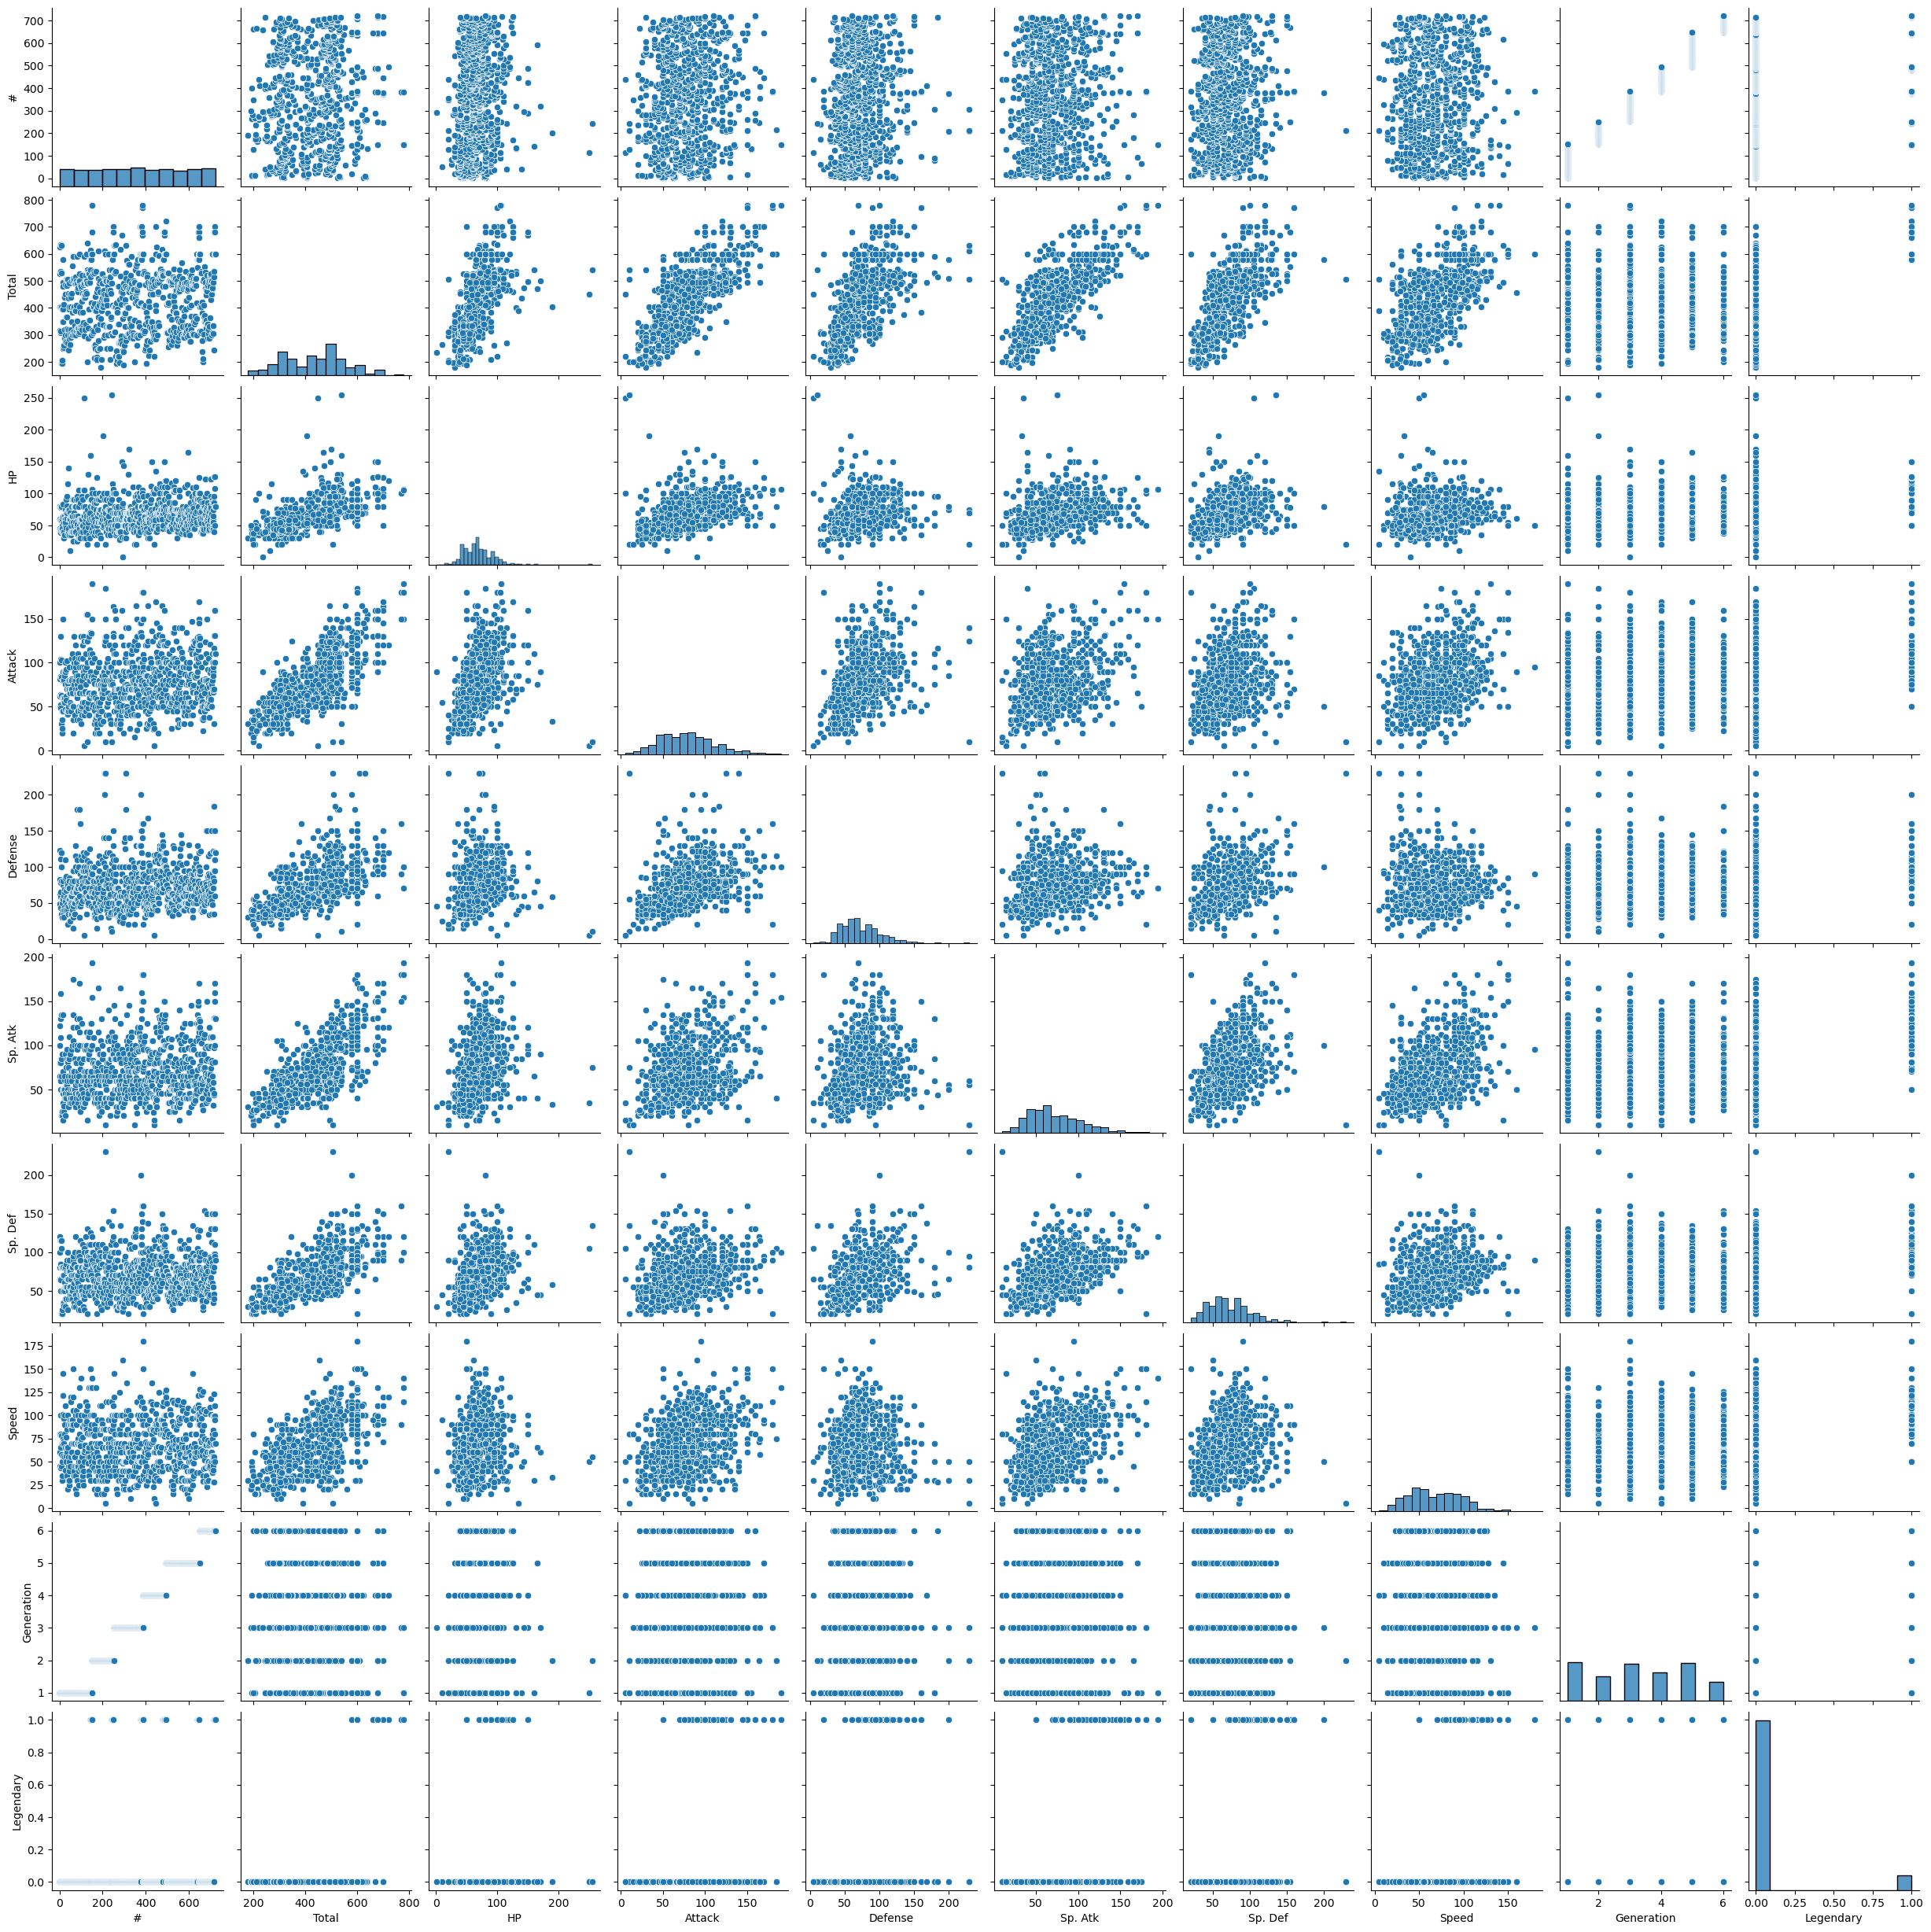

In [9]:
sns.pairplot(pokemon)

<AxesSubplot:>

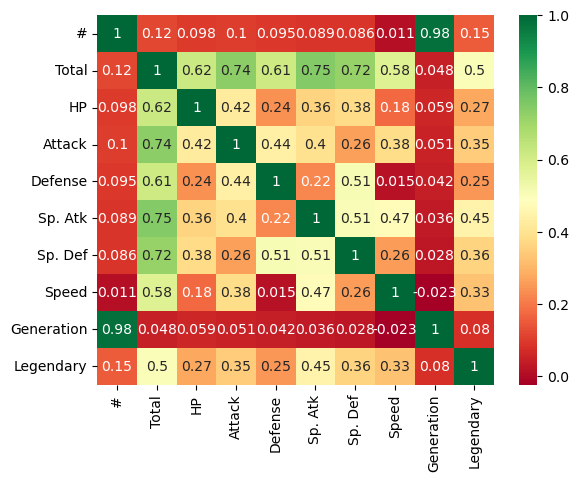

In [10]:
sns.heatmap(pokemon.corr(),annot=True,cmap='RdYlGn')

# ****Data Cleaning****

In [11]:
# Rename Feature headers
newFeats = {'#': 'ID',
            'Type 1': 'Type1',
            'Type 2': 'Type2',
            'Sp. Atk': 'SpAtk',
            'Sp. Def': 'SpDef'}
 
# call rename () method
pokemon.rename(columns=newFeats,
          inplace=True)

pokemon.head()

,ID,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
# One-hot encode features Type1 and Type2
poke_df = pd.get_dummies(pokemon.filter(like='Type').stack()).groupby(level=0).max()
poke_df = pd.concat([pokemon,poke_df], axis='columns')
poke_df.head()

,ID,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,1,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,1,0,0,0,1,0,0,0,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Change Features Type1 and Type2 into Types, ex. (1 or 2) element types
for i in range(poke_df.shape[0]):
    if pd.isnull(poke_df.at[i,'Type2']):
        poke_df.at[i,'Dual_Type'] = 0
    else:
        poke_df.at[i,'Dual_Type'] = 1
poke_df['Dual_Type'] = poke_df['Dual_Type'].astype(int)
poke_df.head()

,ID,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Dual_Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,1,0,0,0,1,0,0,0,0,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,1,0,0,0,1,0,0,0,0,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,1,0,0,0,1,0,0,0,0,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,1,0,0,0,1,0,0,0,0,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Convert boolean to 0 1 int
poke_df['Legendary'] = poke_df.Legendary.astype(int)
poke_df.Legendary.dtype

dtype('int64')

In [15]:
# drop unnecessary columns
poke_df = poke_df.drop(columns=['Type1', 'Type2'])
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        800 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   SpAtk       800 non-null    int64 
 7   SpDef       800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    int64 
 11  Bug         800 non-null    uint8 
 12  Dark        800 non-null    uint8 
 13  Dragon      800 non-null    uint8 
 14  Electric    800 non-null    uint8 
 15  Fairy       800 non-null    uint8 
 16  Fighting    800 non-null    uint8 
 17  Fire        800 non-null    uint8 
 18  Flying      800 non-null    uint8 
 19  Ghost       800 non-null    uint8 
 20  Grass     

# Data Exploration with Cleaned Data

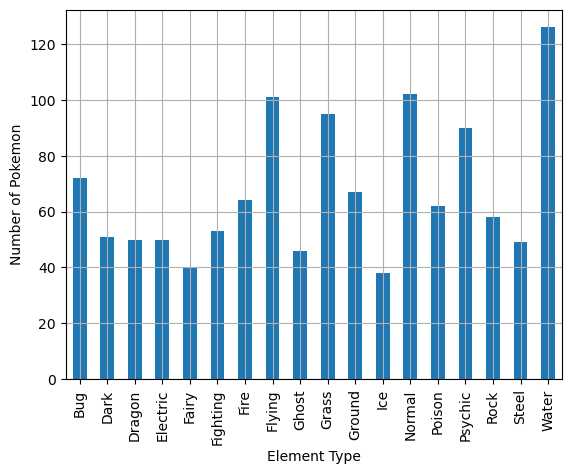

In [16]:
# Diversity of pokemon element types
poke_df[poke_df.columns[11:29]].sum().plot.bar().grid()


plt.xlabel('Element Type')
plt.ylabel('Number of Pokemon')
plt.show()

In [17]:
poke1 = poke_df.drop(columns=poke_df.columns[0:11])
# poke1 = poke1.T
# poke1['Total'] = poke1.sum(axis=1)

# poke1 = pd.melt(poke1, id_vars =['Dual_Type'], value_vars = poke1.columns[0:18],
#                var_name='Element_Type')
poke2 = poke1.query("Dual_Type == 1")
poke2 = poke2.T
poke2['Total'] = poke2.sum(axis=1)
poke2 = poke2.drop(columns=poke2.columns[0:-1]).drop('Dual_Type').reset_index()
poke2['Dual_Type'] = 1

poke3 = poke1.query("Dual_Type == 0")
poke3 = poke3.T
poke3['Total'] = poke3.sum(axis=1)
poke3 = poke3.drop(columns=poke3.columns[0:-1]).drop('Dual_Type').reset_index()
poke3['Dual_Type'] = 0
poke3.head(20)

,index,Total,Dual_Type
0,Bug,17,0
1,Dark,10,0
2,Dragon,11,0
3,Electric,27,0
4,Fairy,15,0
5,Fighting,20,0
6,Fire,28,0
7,Flying,2,0
8,Ghost,10,0
9,Grass,33,0


In [18]:
poke2 = poke2.append(poke3).reset_index().drop(columns=['level_0'])
poke2 = poke2.rename(columns={'index':'Element_Type'})
poke2.head(20)

,Element_Type,Total,Dual_Type
0,Bug,55,1
1,Dark,41,1
2,Dragon,39,1
3,Electric,23,1
4,Fairy,25,1
5,Fighting,33,1
6,Fire,36,1
7,Flying,99,1
8,Ghost,36,1
9,Grass,62,1


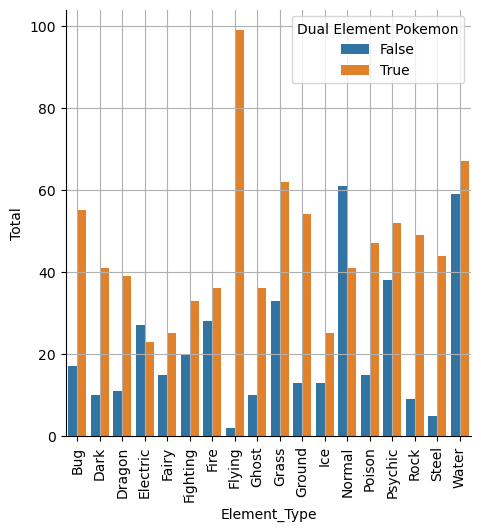

In [19]:
ax = sns.catplot(x = 'Element_Type', y='Total', hue = 'Dual_Type', data=poke2,
                 kind='bar', legend=False)

ax.set_xticklabels(rotation=90)

# set legend
legend=plt.legend(loc='upper right', title='Dual Element Pokemon')
legend.get_texts()[0].set_text('False')
legend.get_texts()[1].set_text('True')

plt.grid()
plt.show(ax)

<AxesSubplot:>

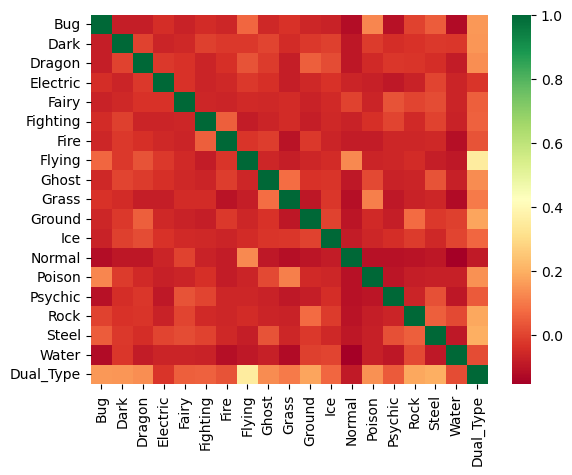

In [20]:
sns.heatmap(poke_df.drop(columns=(poke_df.columns[0:11])).corr(),annot=False,cmap='RdYlGn')

<AxesSubplot:>

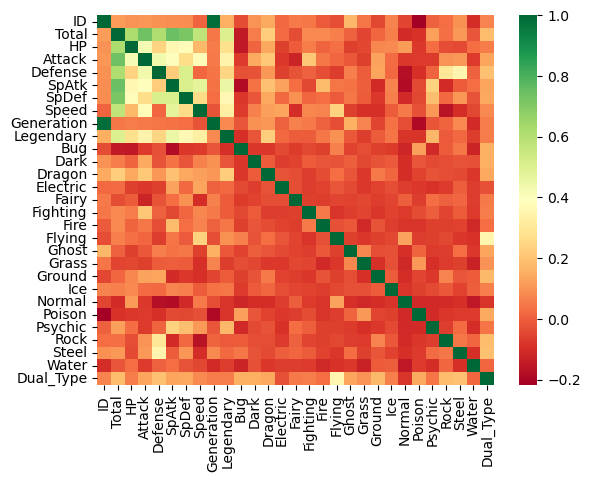

In [21]:
sns.heatmap(poke_df.corr(),annot=False,cmap='RdYlGn',xticklabels=True, yticklabels=True)

<AxesSubplot:>

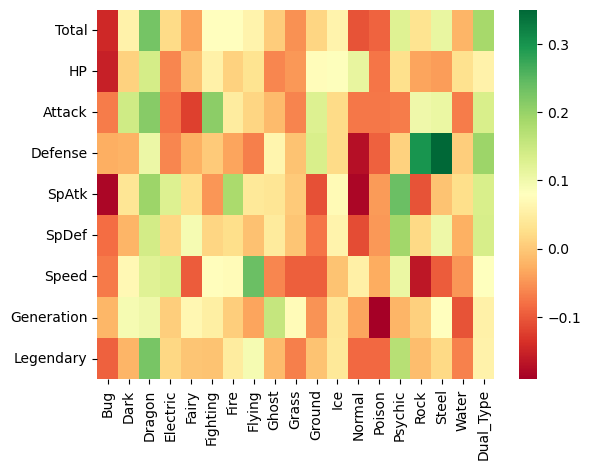

In [22]:
poke_corr = poke_df.corr()
poke_corr = poke_corr.drop(columns=poke_corr.columns[0:10])
poke_corr = poke_corr.drop(['ID','Bug','Dark','Dragon','Electric','Fairy','Fighting','Fire','Flying','Ghost','Grass','Ground','Ice','Normal','Poison','Psychic','Steel','Water','Rock','Dual_Type'])
sns.heatmap(poke_corr,annot=False,cmap='RdYlGn')

In [23]:
poke_df.query("Psychic == 1").describe()

,ID,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Dual_Type
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.0,90.0,90.000000,90.000000,90.000000,90.000000
mean,364.800000,477.088889,71.211111,72.644444,74.777778,94.600000,86.766667,77.088889,3.222222,0.211111,...,0.033333,0.022222,0.022222,0.022222,0.0,1.0,0.022222,0.077778,0.055556,0.577778
std,187.707949,133.760363,25.317975,37.924026,30.754109,37.687598,29.451941,35.340604,1.584885,0.410383,...,0.180511,0.148231,0.148231,0.148231,0.0,0.0,0.148231,0.269322,0.230345,0.496681
min,63.000000,198.000000,20.000000,20.000000,15.000000,23.000000,20.000000,15.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,201.250000,340.750000,55.000000,45.750000,54.250000,68.500000,65.000000,48.500000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000
50%,375.500000,488.500000,68.000000,67.000000,70.000000,95.000000,85.000000,77.500000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.000000
75%,511.250000,600.000000,80.000000,94.250000,90.000000,123.750000,110.000000,103.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,1.000000
max,720.000000,780.000000,190.000000,190.000000,180.000000,194.000000,160.000000,180.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000


In [24]:
poke_df.query("Bug == 1").describe()

,ID,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Dual_Type
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,...,72.000000,72.000000,72.0,72.0,72.000000,72.0,72.000000,72.000000,72.000000,72.000000
mean,336.472222,379.527778,56.736111,71.763889,71.111111,53.569444,64.666667,61.680556,3.222222,0.0,...,0.083333,0.027778,0.0,0.0,0.180556,0.0,0.069444,0.097222,0.013889,0.763889
std,206.416710,116.355692,16.308637,36.998094,33.250460,26.399331,31.562145,32.618938,1.567471,0.0,...,0.278325,0.165489,0.0,0.0,0.387349,0.0,0.255992,0.298339,0.117851,0.427672
min,10.000000,194.000000,1.000000,10.000000,30.000000,10.000000,20.000000,5.000000,1.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,186.750000,281.000000,45.000000,45.000000,50.000000,33.750000,45.000000,36.000000,2.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,302.500000,392.500000,60.000000,65.000000,60.000000,50.000000,60.000000,60.000000,3.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,542.250000,477.250000,70.000000,91.000000,90.000000,66.000000,80.000000,85.000000,5.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,666.000000,600.000000,86.000000,185.000000,230.000000,135.000000,230.000000,160.000000,6.000000,0.0,...,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


# ****Hypotheses****
* Per generation, pokemon with higher ID numbers have better overall stats than pokemon with lower ID numbers. 
* Pokemon with only one element type have higher SpAtk and SpDef values than pokemon with two element types.
* For balancing purposes, pokemon with high attack power have low defense power, and pokemon with low attack power have high defense power.

*****Hypothesis Testing*****

Pokemon with only one element type have higher SpAtk and SpDef values than pokemon with two element types.
    
  H0: Pokemon with only one element type do not have higher SpAtk and SpDef values than pokemon with two element tyeps

  HA: Pokemon with only one element type have higher SpAtk and SpDef values than pokemon with two element types.